**линейный классификатор на TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
print(tf.__version__)

2.3.1


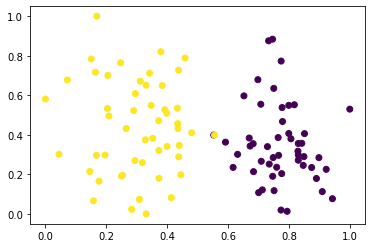

In [3]:
from sklearn.datasets import make_blobs

n_samples = 100 # количество примеров
n_fetch = 2 # размерность пространства признаков
# n_out = 1 # размерность выхода модели 

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_fetch,  
        random_state=461,
        cluster_std=[1.0, 1.1,],
       )

X = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
y = y.reshape([-1,1])
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
# пакуем данные в формат TF
X_train = tf.cast(X,tf.float32),
y_train = tf.cast(y.reshape([-1,1]),tf.float32)

In [5]:
# строим линейный классификатор

# параметры модели
W = tf.Variable(np.random.rand(n_fetch,1),dtype=tf.float32)
b = tf.Variable(np.random.rand(1),dtype=tf.float32)

# линейный классификатор
model = lambda x: tf.matmul(x,W)+b

# функция потери
loss = lambda real_y, pred_y: tf.reduce_mean( tf.abs(real_y - pred_y) )

In [6]:
# реализуем метод градиентного спуска

learning_rate = .05 # коэффициент скорости обучения
training_epochs = 100 # количество эпох обучения
loss_history = []  # история измениения ф-ции потери

# метод оптимизации (способ изменения весов)
optimizer = tf.optimizers.Adam(learning_rate)

# шаг процесса оптимизации 
def step( x_real, y_real ):
    # tf.GradientTape() allows us to track TensorFlow computations 
    # and calculate gradients with respect to some given variables
    with tf.GradientTape(persistent=True) as tape:
        # считаем потерю
        loss_value = loss(y_real, model(x_real) )
    
    # значение градиента
    W_gradients, b_gradients = tape.gradient(loss_value, (W,b))

    # изменияем веса
    optimizer.apply_gradients([
            [ W_gradients, W ], 
            [ b_gradients, b ],
        ])

    # обновляем историю значений ф-ции потери 
    loss_history.append(loss_value.numpy())

# основной цикл обучения
for _ in range(training_epochs): step(X_train, y_train)

In [7]:
# оптимизированные веса
W.numpy(),b.numpy()

(array([[-1.7651657],
        [-0.1805887]], dtype=float32),
 array([1.5125045], dtype=float32))

In [8]:
# проверяем результат
s = model(X_train).numpy() 
r = (s>0.5).astype(np.int8)

# accuracy, доля правильных ответов
(y==r).sum()/y.shape[0]

0.99

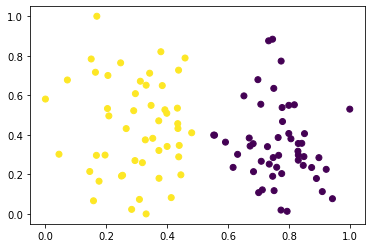

In [9]:
# результат классификации
plt.scatter(X[:,0],X[:,1],c=r) 

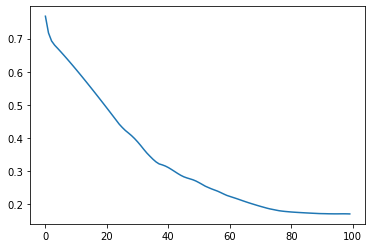

In [10]:
# история изменения ф-ции потери
plt.plot(loss_history) 